In [18]:
import scqubits as scq

In [19]:
transmon = scq.Transmon(
    EJ=30.0,
    EC=1.2,
    ng=0.3,
    ncut=31
)

## Energy spectrum

The energy eigenvalues of the transmon Hamiltonian are obtained by calling the
`eigenvals()` method. The optional parameter `evals_count`
specifies the sought number of eigenenergies:

In [4]:
transmon.eigenvals(evals_count=12)

array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385,  54.55166998,  67.49080961,
        90.05007774, 107.1126152 , 135.67738991, 156.68121682])

.. warning::
   scqubits does not check convergence with respect to Hilbert space truncation. For example, in the case of the transmon qubit,
   this regards the charge cutoff `ncut`. Responsibility to establish convergence with respect to cutoffs lies with the user.

To plot eigenenergies as a function of one of the qubit parameters (`EJ`, `EC`, or `ng`), the first step is to generate an array of values for the desired parameter. Then, call the method `plot_evals_vs_paramvals`, specifying the parameter to be varied as a string. The following is an example for eigenenergies as a function of offset charge `ng`:

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

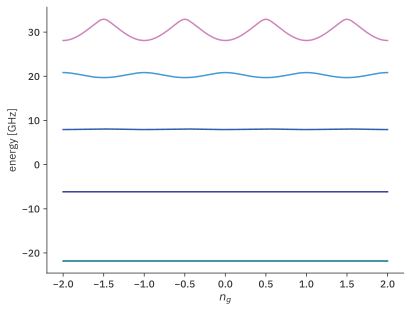

In [5]:
import numpy as np

ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

Plotting routines generally return a matplotlib.Figure and a matplotlib.axes object, in case further processing is desired.

The full eigensystem consisting of both eigenvalues and eigenvectors is obtained through the method `eigensys()`. For the transmon qubit, the calculation proceeds in the charge basis, and uses `scipy.linalg.eigh` for matrix diagonalization. Accordingly, the eigenvector corresponding to the lowest eigenvalue is `evecs.T[0]`.

In [6]:
evals, evecs = transmon.eigensys()

### Plotting energy dispersion
The sensitivity of energy levels (or, more specifically, transition energies) to changes in an external parameter like the offset charge are important for qubit's dephasing time. Plots of the energy dispersion, can be obtained easily:

* either for individual energy levels:

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

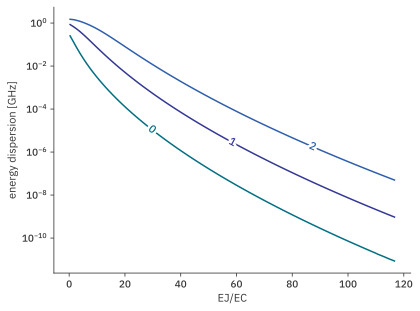

In [7]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', levels=(0,1,2));

* or for transition energies:

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

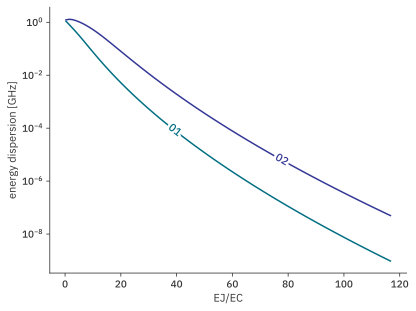

In [8]:
EJvals = np.linspace(0.1, 35, 100)
tmon.plot_dispersion_vs_paramvals('ng', 'EJ', EJvals, ref_param='EC', transitions=(((0,1), (0,2))));